In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio
import os

In [39]:
# Set parameters
num_vertices = 35
metric_space_dim = 2
A1 = 0.99
A2 = 200

In [3]:
def get_influence(timestep):
    in_degrees = dict(G.in_degree(G.nodes()))
    sphere_of_influence = {v: ((A1*in_degrees.get(v))+A2)/timestep for v in G.nodes()}
    return sphere_of_influence

In [50]:
# Plot the graph
def plot_graph(influence = False):
    pos = nx.get_node_attributes(G, 'location')
    nx.draw(G, pos, node_size=20)

    if influence:
        for v in G.nodes():
            sphere_of_influence = get_influence(num_vertices)
            circle = plt.Circle(pos[v], sphere_of_influence[v], color='r', fill=False)
            plt.gca().add_artist(circle)

#     filename = f'network.png'
#     plt.savefig(filename)
    plt.show()

In [5]:
def calculate_effective_distance(G):
    G = G.to_undirected()
    # Calculate distances between all pairs of connected nodes
    distances = []
    for v in G.nodes():
        for u in G.nodes():
            if v != u and nx.has_path(G, v, u):
                distances.append(nx.shortest_path_length(G, v, u))

    # Calculate effective diameter
    distances = np.array(distances)
    effective_diameter = np.percentile(distances, 90)

    print("Effective diameter:", effective_diameter)
    return effective_diameter

Effective diameter: 3.0


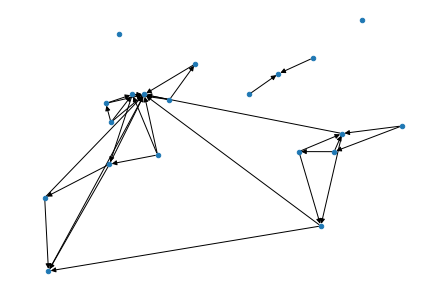

In [51]:
%matplotlib inline
# Initialize the graph with a single vertex
G = nx.DiGraph()
G.add_node(0,location=np.random.rand(metric_space_dim))

# Generate new vertices and add edges
for i in range(1, 20):
    # Choose location of new vertex in metric space corresponding to uniform distribution
    location = np.random.rand(metric_space_dim)*10
    
    # Calculate sphere of influence
    sphere_of_influence = get_influence(i)
    
    # Choose existing vertex to link to
    # Calculate the distances between each vertices
    distances = {v: np.linalg.norm(location - G.nodes[v]['location']) for v in G.nodes()}
    
    # Calculate and regularize the probability of connection
    probabilities = {v: 1 if distances[v]<=sphere_of_influence[v] else 0 for v in G.nodes()}
    
    # print(distances,sphere_of_influence,probabilities)

    # Add new vertex and edge
    G.add_node(i, location=location)
    for v in G.nodes():
        if v!=i and probabilities[v]==1:
            G.add_edge(i, v)
    
    # plot each time-step
#     plot_graph(True)

# Calculate the effective distance
_ = calculate_effective_distance(G)

plot_graph()

In [46]:
%matplotlib agg
G = G.to_undirected()
# select a random source node
source_node = random.choice(list(G.nodes()))

# initialize rumour spreading
infected_nodes = set([source_node])
time_step = 0

# track the number of consecutive steps without new infections
no_new_infections = 0  


# create list of node colors for visualization
node_colors = ['blue' if node == source_node else 'gray' for node in G.nodes()]

# create list of images for GIF
images = []

# simulate rumour spreading
while len(infected_nodes) < len(G.nodes()) and no_new_infections < 10:
    time_step += 1
    new_infected_nodes = set()
    for node in infected_nodes:
        neighbours = list(G.neighbors(node))
        random.shuffle(neighbours)
        for neighbour in neighbours:
            if neighbour not in infected_nodes:
                new_infected_nodes.add(neighbour)
                break
    if len(new_infected_nodes) == 0:
        no_new_infections += 1
    else:
        no_new_infections = 0
    infected_nodes.update(new_infected_nodes)
    
    # update node colors for visualization
#     for node in infected_nodes:
#         node_colors[node] = 'blue'
    for node in new_infected_nodes:
        node_colors[node] = 'blue'
    
    # create a new figure and axis for each time step
    fig, ax = plt.subplots()
    ax.set_title(f'Iteration {time_step}')
    nx.draw(G, pos=nx.circular_layout(G), node_color=node_colors, with_labels=False, ax=ax)
    
    # save the figure as an image
    filename = f'rumour_spreading_{time_step}.png'
    plt.savefig(filename)
    plt.close()
    images.append(imageio.imread(filename))
    os.remove(filename)
    

# create GIF from list of images
imageio.mimsave('rumour_spreading.gif', images, fps=2)

In [9]:
time_step

6

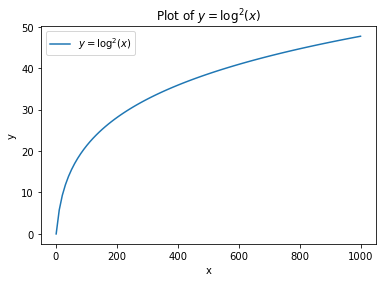

In [8]:
# Generate x values
x = np.linspace(1, 1000, 100)  # Avoid log(0) by starting from a small positive value

# Compute y values
y = np.log(x)**2

# Plot the function
plt.plot(x, y, label=r'$y = \log^2(x)$')
# plt.plot(n, ed, label=r'N & effective distance')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = \log^2(x)$')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [315]:
# Set parameters
%matplotlib inline

# Initialize the graph with a single vertex
G = nx.DiGraph()
G.add_node(0,location=np.random.rand(metric_space_dim))

# Generate new vertices and add edges
for i in range(1, num_vertices):
    # Choose location of new vertex in metric space corresponding to uniform distribution
    location = np.random.rand(metric_space_dim)*10
    
    # Calculate sphere of influence
    sphere_of_influence = get_influence(i)
    
    # Choose existing vertex to link to
    # Calculate the distances between each vertices
    distances = {v: np.linalg.norm(location - G.nodes[v]['location']) for v in G.nodes()}
    
    # Calculate and regularize the probability of connection
    probabilities = {v: 1 if distances[v]<=sphere_of_influence[v] else 0 for v in G.nodes()}
    
    # print(distances,sphere_of_influence,probabilities)

    # Add new vertex and edge
    G.add_node(i, location=location)
    for v in G.nodes():
        if v!=i and probabilities[v]==1:
            G.add_edge(i, v)
# plot_graph(True)

%matplotlib agg

G = G.to_undirected()
# select a random source node
source_node = random.choice(list(G.nodes()))

# initialize rumour spreading
infected_nodes = set([source_node])
time_step = 0

# track the number of consecutive steps without new infections
no_new_infections = 0  


# create list of node colors for visualization
node_colors = ['blue' if node == source_node else 'gray' for node in G.nodes()]

# create list of images for GIF
images = []

# simulate rumour spreading
while len(infected_nodes) < len(G.nodes()) and no_new_infections < 5:
    time_step += 1
    new_infected_nodes = set()
    for node in infected_nodes:
        neighbours = list(G.neighbors(node))
        random.shuffle(neighbours)
        for neighbour in neighbours:
            if neighbour not in infected_nodes:
                new_infected_nodes.add(neighbour)
                break
    if len(new_infected_nodes) == 0:
        no_new_infections += 1
    else:
        no_new_infections = 0
    infected_nodes.update(new_infected_nodes)
    
# update node colors for visualization
    for node in new_infected_nodes:
        node_colors[node] = 'blue'
    
    # create a new figure and axis for each time step
    fig, ax = plt.subplots()
    ax.set_title(f'Iteration {time_step}')
    nx.draw(G, pos=nx.circular_layout(G), node_color=node_colors, with_labels=False, ax=ax)
    
    # save the figure as an image
    filename = f'rumour_spreading_{time_step}.png'
    plt.savefig(filename)
    plt.close()
    images.append(imageio.imread(filename))
    os.remove(filename)
    
if time_step > 19:
    # create GIF from list of images
    imageio.mimsave(f'rumour_spreading_{num_vertices}_{time_step}.gif', images, fps=2)

print(num_vertices,time_step)

40 22


In [306]:
num_vertices = 40
metric_space_dim = 2
A1 = 2
A2 = 29

In [177]:
def get_influence_sim(G,timestep):
    in_degrees = dict(G.in_degree(G.nodes()))
    sphere_of_influence = {v: ((A1*in_degrees.get(v))+A2)/timestep for v in G.nodes()}
    return sphere_of_influence

def simulation(num_vertices,metric_space_dim,A1,A2,interval=5):
    for num_vertice in range(200,num_vertices,interval):
        average_step = []
        for _ in range(20):
            # Initialize the graph with a single vertex
            G = nx.DiGraph()
            G.add_node(0,location=np.random.rand(metric_space_dim))

            # Generate new vertices and add edges
            for i in range(1, num_vertice):
                # Choose location of new vertex in metric space corresponding to uniform distribution
                location = np.random.rand(metric_space_dim)*10

                # Calculate sphere of influence
                sphere_of_influence = get_influence_sim(G,i)

                # Choose existing vertex to link to
                # Calculate the distances between each vertices
                distances = {v: np.linalg.norm(location - G.nodes[v]['location']) for v in G.nodes()}

                # Calculate and regularize the probability of connection
                probabilities = {v: 1 if distances[v]<=sphere_of_influence[v] else 0 for v in G.nodes()}

                # print(distances,sphere_of_influence,probabilities)

                # Add new vertex and edge
                G.add_node(i, location=location)
                for v in G.nodes():
                    if v!=i and probabilities[v]==1:
                        G.add_edge(i, v)



            G = G.to_undirected()
            # select a random source node
            source_node = random.choice(list(G.nodes()))

            # initialize rumour spreading
            infected_nodes = set([source_node])
            time_step = 0

            # track the number of consecutive steps without new infections
            no_new_infections = 0  

            # simulate rumour spreading
            while len(infected_nodes) < len(G.nodes()) and no_new_infections < 5:
                time_step += 1
                new_infected_nodes = set()
                for node in infected_nodes:
                    neighbours = list(G.neighbors(node))
                    random.shuffle(neighbours)
                    for neighbour in neighbours:
                        if neighbour not in infected_nodes:
                            new_infected_nodes.add(neighbour)
                            break
                if len(new_infected_nodes) == 0:
                    no_new_infections += 1
                else:
                    no_new_infections = 0
                infected_nodes.update(new_infected_nodes)

            if len(infected_nodes) > 0.9*len(G.nodes()):
                average_step.append(time_step)
        print(num_vertice,np.average(average_step))

        
num_vertices = 1000
metric_space_dim = 2
A1 = 0.99
A2 = 200

simulation(num_vertices,metric_space_dim,A1,A2)

200 11.55
205 12.55
210 12.35
215 12.55
220 11.9
225 13.25
230 13.4
235 13.6
240 13.6
245 13.65
250 13.75
255 13.65
260 14.4
265 14.1
270 14.95
275 15.6
280 14.95
285 16.157894736842106
290 15.75
295 15.473684210526315
300 15.95
305 15.85
310 16.75
315 16.9
320 17.55
325 17.0
330 18.105263157894736
335 17.5
340 17.85
345 19.3
350 17.65
355 19.0
360 18.25
365 18.65
370 19.05263157894737
375 19.8
380 19.5
385 19.2
390 19.736842105263158
395 19.31578947368421
400 19.5
405 20.0
410 19.333333333333332
415 19.4
420 20.3
425 19.55
430 19.94736842105263
435 20.4
440 20.3


KeyboardInterrupt: 

In [178]:
import pandas as pd

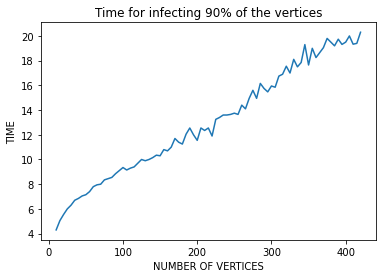

In [192]:
%matplotlib inline
df = pd.read_csv('spread.txt', sep=" ", header=None)
df.set_index(0, inplace=True)


plt.xlabel('NUMBER OF VERTICES')
plt.ylabel('TIME')
plt.title('Time for infecting 90% of the vertices')
plt.plot(df, label=r'Time to spread 90% of the vertices')
plt.show()

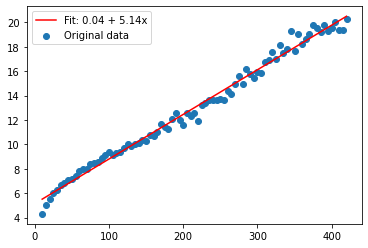

In [198]:
df = pd.read_csv('spread.txt', sep=" ", header=None)
x = df[0]
y = df[1]

coefficients = np.polyfit(x, y, deg=1)
fit = np.poly1d(coefficients)

plt.scatter(x, y, label='Original data')

plt.plot(x, fit(x), color='red', label='Fit: {:.2f} + {:.2f}x'.format(*coefficients))
plt.legend()
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('spread.txt', sep=" ", header=None)
x = df[0]
y = df[1]

coefficients = np.polyfit(x, y, deg=1)
fit = np.poly1d(coefficients)

y_pred = fit(x)

mse = mean_squared_error(y, y_pred)

r2 = r2_score(y, y_pred)

print('MSE: ', mse)
print('R²: ', r2)

MSE:  0.2263873046392867
R²:  0.9883271060887636


In [203]:
y_pred

array([ 5.50861114,  5.69135011,  5.87408908,  6.05682805,  6.23956702,
        6.42230599,  6.60504496,  6.78778392,  6.97052289,  7.15326186,
        7.33600083,  7.5187398 ,  7.70147877,  7.88421774,  8.06695671,
        8.24969568,  8.43243465,  8.61517362,  8.79791259,  8.98065156,
        9.16339053,  9.3461295 ,  9.52886847,  9.71160744,  9.89434641,
       10.07708538, 10.25982435, 10.44256332, 10.62530229, 10.80804126,
       10.99078023, 11.1735192 , 11.35625817, 11.53899714, 11.72173611,
       11.90447508, 12.08721405, 12.26995302, 12.45269199, 12.63543096,
       12.81816993, 13.0009089 , 13.18364787, 13.36638684, 13.54912581,
       13.73186478, 13.91460375, 14.09734272, 14.28008169, 14.46282066,
       14.64555963, 14.8282986 , 15.01103757, 15.19377654, 15.37651551,
       15.55925448, 15.74199345, 15.92473242, 16.10747139, 16.29021036,
       16.47294933, 16.6556883 , 16.83842726, 17.02116623, 17.2039052 ,
       17.38664417, 17.56938314, 17.75212211, 17.93486108, 18.11